# Setup

In [1]:
# !pip install zadeh

In [2]:
import zadeh
import matplotlib.pyplot as plt
# set dpi
plt.rcParams['figure.figsize'] = [5, 3]

# Variables

**Step 1. Define the input variables**

The linguistic variables are:

1. ``slum_population``: Proportion of urban population living in slum, in percentage terms [%]
2. ``matter_concentration``: Annual mean concentration of particulate matter of less than 2.5 microns in diameter (PM2.5) [mg/m3]
3. ``water_access``: Access to improved water source, in percentage terms of urban population [%]
4. ``public_transport_satisfaction``: Satisfaction with public transport, in percentage [%]
5. ``rent_overburden_population``: Population with rent overburden, in percentage [%]

The *universe of discourse* is $[0, 1] \subseteq \mathbb{R}$ in all cases. Below, the membership functions are defined.

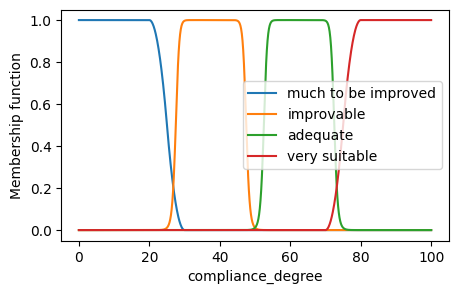

In [92]:
# variable definition
slum_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("slum_population", 0, 100, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(3, 5),
        'adequate': zadeh.BellFuzzySet(5, 5, 10),
        'improvable': zadeh.BellFuzzySet(5, 5, 20),
        'much to be improved': zadeh.SFuzzySet(23, 30),
    },
)

matter_concentration = zadeh.FuzzyVariable(
    zadeh.FloatDomain("matter_concentration", 0, 87, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(7, 12),
        'adequate': zadeh.BellFuzzySet(4, 3, 13.75),
        'improvable': zadeh.BellFuzzySet(4, 3, 21.25),
        'much to be improved': zadeh.SFuzzySet(23, 30),
    },
)

water_access = zadeh.FuzzyVariable(
    zadeh.FloatDomain("water_access", 0, 100, 1000),
    {
        'much to be improved': zadeh.ZFuzzySet(72, 77),
        'improvable': zadeh.BellFuzzySet(5, 5, 80.75),
        'adequate': zadeh.BellFuzzySet(5, 5, 92.25),
        'very suitable': zadeh.SFuzzySet(97, 100),
    },
)

public_transport_satisfaction = zadeh.FuzzyVariable(
    zadeh.FloatDomain("public_transport_satisfaction", 0, 100, 1000),
    {
        'much to be improved': zadeh.ZFuzzySet(42, 45),
        'improvable': zadeh.BellFuzzySet(7, 7, 50.25),
        'adequate': zadeh.BellFuzzySet(7, 7, 64.75),
        'very suitable': zadeh.SFuzzySet(70, 74),
    },
)

rent_overburden_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("rent_overburden_population", 0, 100, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(5, 7),
        'adequate': zadeh.BellFuzzySet(3, 4, 9.5),
        'improvable': zadeh.BellFuzzySet(3, 4, 14.5),
        'much to be improved': zadeh.SFuzzySet(15, 19),
    },
)

# OUTPUT
compliance_degree = zadeh.FuzzyVariable(
    zadeh.FloatDomain("compliance_degree", 0, 100, 1000),
    {
        'much to be improved': zadeh.ZFuzzySet(20, 30),
        'improvable': zadeh.BellFuzzySet(10, 10, 37.5),
        'adequate': zadeh.BellFuzzySet(10, 10, 62.5),
        'very suitable': zadeh.SFuzzySet(70, 80),
    },
)

# slum_population.plot()
# matter_concentration.plot()
# water_access.plot()
# public_transport_satisfaction.plot()
# rent_overburden_population.plot()
compliance_degree.plot()

In [93]:
# store linguistic variables as a list
INPUTS = [slum_population,
          matter_concentration,
          water_access,
          public_transport_satisfaction,
          rent_overburden_population]

OUTPUT = [compliance_degree]


In [94]:
REVERSED = [slum_population,
            matter_concentration,
            rent_overburden_population
            ]


NOT_REVERSED = [water_access,
                public_transport_satisfaction
                ]


# Rules


In [103]:
reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=True, weight=1, 
) for input_var in REVERSED]

not_reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=False, weight=1, 
) for input_var in NOT_REVERSED]

rule_set = reversed+not_reversed

# for rule in rule_set:
#     print(rule)

# Build fuzzy inference system

In [96]:
fis = zadeh.FIS(INPUTS, rule_set, compliance_degree, defuzzification='centroid')

In [97]:
IRELAND = {'slum_population': 0,
            'matter_concentration': 7.8, 
            'water_access': 97,
            'public_transport_satisfaction': 61, 
            'rent_overburden_population': 5.6
} 

In [98]:
fis.get_crisp_output(IRELAND)

76.31506079848413

In [102]:
# fis.plot_rules(IRELAND)